In [1]:
# Import pandas 
import pandas as pd
 
# Read the dataset using read_csv method
df = pd.read_csv("Advertising.csv")
 
# See the top-5 records in the data
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [2]:
# Independent variables or Features
X = df[['TV', 'Radio', 'Newspaper']] 
 
# Dependent or Target variable
y = df.Sales 


In [3]:
# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [4]:
# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
 
# Predict the values given test set
predictions = lin_reg.predict(X_test)

# Print the intercept and coefficients
print(lin_reg.intercept_)
print(lin_reg.coef_)

2.89257005115115
[0.04416235 0.19900368 0.00116268]


In [5]:
# Import the required libraries
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
 
# Evaluate mean absolute error
print('Mean Absolute Error(MAE):', mean_absolute_error(y_test,predictions))  
 
# Evaluate mean squared error
print("Mean Squared Error(MSE):", mean_squared_error(y_test, predictions))  
 
# Evaluate root mean squared error
print("Root Mean Squared Error(RMSE):", np.sqrt(mean_squared_error(y_test, predictions)))
 
# Evaluate R2-square
print("R2-Square:",r2_score(y_test, predictions))

Mean Absolute Error(MAE): 1.3000320919235444
Mean Squared Error(MSE): 4.012497522917095
Root Mean Squared Error(RMSE): 2.0031219440955397
R2-Square: 0.8576396745320894


### Q1. Using the above model, what is the expected values of Sales given that: TV= 190, Radio=11, Newspaper=60

In [6]:
lin_reg.intercept_ + (190 * lin_reg.coef_[0]) + (11 * lin_reg.coef_[1]) + (60 * lin_reg.coef_[2])

13.542217089053098

### Q2. Build a linear regression model for the Salaries.csv data set

In [7]:
salaries_df = pd.read_csv("Salaries.csv")

# Independent variables or Features
X = salaries_df[['YearsExperience']]
# Dependent or Target variable
Y = salaries_df['Salary']

# Import train_test_split function from 
from sklearn.model_selection import train_test_split
 
# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

# Import linear regression model
from sklearn.linear_model import LinearRegression
 
# Create linear regression model
lin_reg = LinearRegression()
 
# Fit the linear regression model
lin_reg.fit(X_train, y_train)
 
# Predict the values given test set
predictions = lin_reg.predict(X_test)


### Q3. Print the model coefficients

In [8]:
print(lin_reg.intercept_)
print(lin_reg.coef_)

26986.691316737248
[9379.71049195]


### Q4. Draw a scatter plot for Salary vs Years of Experience, and on the same chart plot Predicted Salary vs Years of Experience 

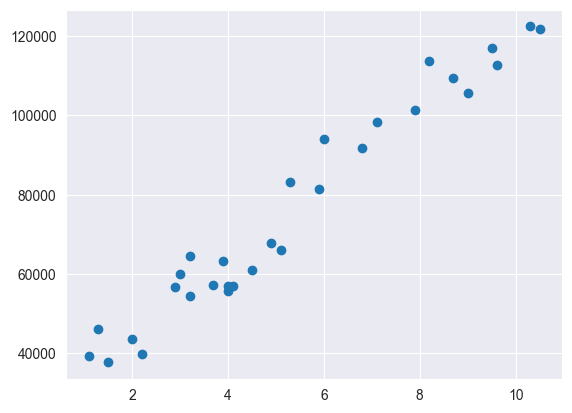

In [9]:
import matplotlib.pyplot as plt
plt.scatter(salaries_df['YearsExperience'], salaries_df['Salary'])


### Q5. What's the predicted salary for a person with 12 years of experience

In [10]:
lin_reg.intercept_ + (12 * lin_reg.coef_[0])

139543.21722008943

### Q6. What's is RSME for the model? What does that mean?

In [11]:
# RMSE (Root Mean Squared Error) 
# measures the average magnitude of the errors between predicted values and actual values
# iow, the avg distance from the dot and line
mse = mean_squared_error(y_test, predictions)
print(np.sqrt(mse))

4733.70258289858


### Logistic Regression

In [12]:
# Import libraries
import pandas as pd
 
# read the dataset
diabetes = pd.read_csv("diabetes.csv")
 
# Show top 5-records
diabetes.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
# split dataset in two parts: feature set and target label 
feature_set = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
features = diabetes[feature_set] 
target = diabetes.label

# partition data into training and testing set 
from sklearn.model_selection import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3, random_state=1)

In [14]:
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score # for performance evaluation
 
# instantiate the model
logreg = LogisticRegression(solver='lbfgs')
 
# fit the model with data
logreg.fit(feature_train,target_train)
 
# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
#print(abs(predictions - target_test))

 
# Assess model performance using accuracy measure
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(target_test, predictions)
print (cnf_matrix)


print("Accuracy:",metrics.accuracy_score(target_test, predictions))

print ("F1: ", metrics.f1_score(target_test, predictions, average='binary'))


[[132  14]
 [ 36  49]]
Accuracy: 0.7835497835497836
F1:  0.6621621621621622


C:\Users\Markus\OneDrive - BCIT\Desktop\term4\ACIT-4880-Introduction-to-Data-Analytics\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Q7. Given these numbers, check if it's likely that the person will get diabetes
### {'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]}

In [15]:
blah = pd.DataFrame({'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [34], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]})
logreg.predict(blah)

array([0], dtype=int64)

### Q8. Change the age to 35, check if it's likely that the person will get diabetes

In [16]:
blah = pd.DataFrame({'pregnant': [7], 'insulin': [180], 'bmi': [35], 'age': [35], 'glucose': [130], 'bp': [70], 'pedigree': [0.6]})
logreg.predict(blah)

array([1], dtype=int64)


### Q9. Given the LoanPayback data set, build a logistic regression model

In [17]:
# read the dataset
loan_payback = pd.read_csv("LoanPayback.csv")
loan_payback
feature_set = ['Income ($000)', 'Loan Amount ($000)']
features = loan_payback[feature_set]
target = loan_payback['Payback (0 = No, 1 = Yes)']

# partition data into training and testing set 
from sklearn.model_selection import train_test_split

feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.3,
                                                                          random_state=1)
# import logistic regression scikit-learn model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  # for performance evaluation

# instantiate the model
logreg = LogisticRegression(solver='lbfgs')

# fit the model with data
logreg.fit(feature_train, target_train)

# Forecast the target variable for given test dataset
predictions = logreg.predict(feature_test)
#print(abs(predictions - target_test))


# Assess model performance using accuracy measure
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(target_test, predictions)
print(cnf_matrix)

print("Accuracy:", metrics.accuracy_score(target_test, predictions))

print("F1: ", metrics.f1_score(target_test, predictions, average='binary'))

[[4 0]
 [5 2]]
Accuracy: 0.5454545454545454
F1:  0.4444444444444444


### Q10. Is it likely that a student with income 14000 will payback a 5000 loan?

In [18]:
blah = pd.DataFrame({'Income ($000)': [14000], 'Loan Amount ($000)': [5000]})
logreg.predict(blah)

array([0], dtype=int64)